# Diabetes 데이터와 Linear Regression

당뇨병 진행도와 관련된 데이터를 이용해 당뇨병 진행을 예측하는 Linear Regression을 학습해 보겠습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Data Load
데이터는 `sklearn.datasets` 의 `load_diabetes` 함수를 이용해 받을 수 있습니다.

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

당뇨병 데이터에서 사용되는 변수명은 `feature_names` 키 값으로 들어 있습니다.  
변수명과 변수에 대한 설명은 다음과 같습니다.
- `age`: 나이
- `sex`: 성별
- `bmi`: Body mass index
- `bp`: Average blood pressure
- 혈청에 대한 6가지 지표들
    - `S1`, `S2`, `S3`, `S4`, `S5`, `S6`
    

In [3]:
diabetes["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

데이터와 정답을 확인해 보겠습니다.

In [4]:
data, target = diabetes["data"], diabetes["target"]

In [5]:
data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [6]:
target[0]

151.0

### 1.2 Data EDA

In [7]:
df = pd.DataFrame(data, columns=diabetes["feature_names"])

In [8]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


### 1.3 Data Split 

`sklearn.model_selection`의 `train_test_split`함수를 이용해 데이터를 나누겠습니다.


```python
 train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
```
- `*arrays`: 입력은 array로 이루어진 데이터을 받습니다.
- `test_size`: test로 분할될 사이즈를 정합니다.
- `train_size`: train으로 분할될 사이즈를 정합니다.
- `random_state`: 다음에도 같은 값을 얻기 위해서 난수를 고정합니다
- `shuffle`: 데이터를 섞을지 말지 결정합니다.
- `stratify`: 데이터를 나눌 때 정답의 분포를 반영합니다.

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3)

train과 test를 7:3의 비율로 나누었습니다.  
실제로 잘 나누어졌는지 확인해보겠습니다.

In [10]:
len(data), len(train_data), len(test_data)

(442, 309, 133)

In [11]:
print("train ratio : {:.2f}".format(len(train_data)/len(data)))
print("test ratio : {:.2f}".format(len(test_data)/len(data)))

train ratio : 0.70
test ratio : 0.30


## 2. Multivariate Regression

### 2.1 학습

In [12]:
from sklearn.linear_model import LinearRegression


multi_regressor = LinearRegression()
multi_regressor.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2.2 회귀식 확인

In [13]:
multi_regressor.intercept_

147.71524417759434

In [14]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

### 2.3 예측

In [15]:
multi_train_pred = multi_regressor.predict(train_data)
multi_test_pred = multi_regressor.predict(test_data)

### 2.4 평가

평가는 `sklearn.metrics` 의 `mean_squared_error`를 이용하겠습니다.
mean_squared_error는 두 값의 차이의 제곱의 평균을 계산해줍니다.

In [16]:
from sklearn.metrics import mean_squared_error

multi_train_mse = mean_squared_error(multi_train_pred, train_target)
multi_test_mse = mean_squared_error(multi_test_pred, test_target)

In [17]:
print(f"Multi Regression Train MSE is {multi_train_mse:.4f}")
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")

Multi Regression Train MSE is 3034.2623
Multi Regression Test MSE is 2562.2750


## 3. Ridge Regression

### 3.1 학습

In [18]:
from sklearn.linear_model import Ridge


ridge_regressor = Ridge()
ridge_regressor.fit(train_data, train_target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### 3.2 회귀식 확인

In [19]:
ridge_regressor.intercept_

147.74060119766182

In [21]:
multi_regressor.coef_

array([  15.28529701, -218.59128442,  545.19999487,  263.6592052 ,
       -582.66349612,  317.33684049,   48.53542723,  215.51374612,
        655.7965519 ,   64.04030953])

In [20]:
ridge_regressor.coef_

array([  46.89201977,  -55.64009506,  270.71747699,  158.68867814,
         23.59440223,  -11.13019705, -130.05870493,  122.00237806,
        225.92117758,  107.08728777])

### 3.3 예측

In [22]:
ridge_train_pred = ridge_regressor.predict(train_data)
ridge_test_pred = ridge_regressor.predict(test_data)

### 3.4 평가

In [23]:
ridge_train_mse = mean_squared_error(ridge_train_pred, train_target)
ridge_test_mse = mean_squared_error(ridge_test_pred, test_target)

In [24]:
print(f"Ridge Regression Train MSE is {ridge_train_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")

Ridge Regression Train MSE is 3556.1983
Ridge Regression Test MSE is 3200.4051


## 4. LASSO Regression

### 4.1 학습

In [25]:
from sklearn.linear_model import Lasso


lasso_regressor = Lasso()
lasso_regressor.fit(train_data, train_target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 4.2 회귀식 확인

In [26]:
lasso_regressor.intercept_

148.13825690433762

In [27]:
lasso_regressor.coef_

array([  0.        ,   0.        , 377.69541767,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       316.05550058,   0.        ])

In [28]:
np.array(diabetes["feature_names"])[lasso_regressor.coef_ != 0]

array(['bmi', 's5'], dtype='<U3')

### 4.3 예측

In [29]:
lasso_train_pred = lasso_regressor.predict(train_data)
lasso_test_pred = lasso_regressor.predict(test_data)

### 4.4 평가

In [30]:
lasso_train_mse = mean_squared_error(lasso_train_pred, train_target)
lasso_test_mse = mean_squared_error(lasso_test_pred, test_target)

In [31]:
print(f"LASSO Regression Train MSE is {lasso_train_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

LASSO Regression Train MSE is 3897.9528
LASSO Regression Test MSE is 3581.6843


## 5. 마무리

### 5.1 평가

In [32]:
print(f"Multi Regression Test MSE is {multi_test_mse:.4f}")
print(f"Ridge Regression Test MSE is {ridge_test_mse:.4f}")
print(f"LASSO Regression Test MSE is {lasso_test_mse:.4f}")

Multi Regression Test MSE is 2562.2750
Ridge Regression Test MSE is 3200.4051
LASSO Regression Test MSE is 3581.6843


### 5.2 예측값과 실제값의 관계 Plot

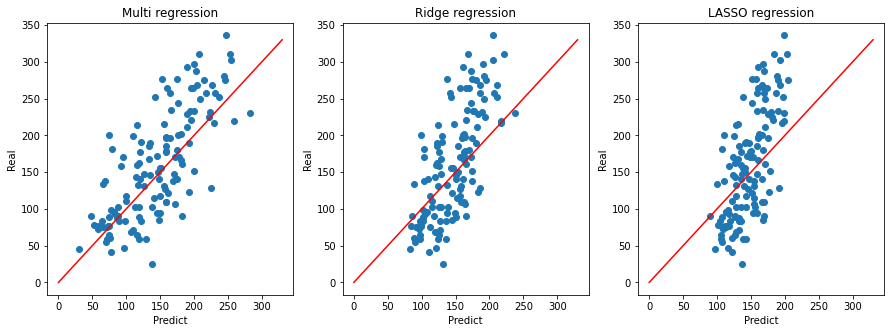

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("Multi regression", multi_test_pred),
    ("Ridge regression", ridge_test_pred),
    ("LASSO regression", lasso_test_pred),
]

for idx, (name, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(test_pred, test_target)
    ax.plot(np.linspace(0, 330, 100), np.linspace(0, 330, 100), color="red")
    ax.set_xlabel("Predict")
    ax.set_ylabel("Real")
    ax.set_title(name)